In [8]:
# Imports

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
#!pip install -q kagglehub
import kagglehub
import shutil
import csv

import random

import PIL.Image as Image

In [6]:
# Load Data

target_dir = "plant_data"
os.makedirs(target_dir, exist_ok=True)


path = kagglehub.dataset_download("emmarex/plantdisease")

for item in os.listdir(path):
    src = os.path.join(path, item)
    dst = os.path.join(target_dir, item)
    
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dst)

print(f"Dataset erfolgreich in '{target_dir}' kopiert.")

100%|██████████| 658M/658M [00:57<00:00, 12.1MB/s] 

Extracting files...


IsADirectoryError: [Errno 21] Is a directory: '/root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/plantvillage'

In [11]:
# Dataframe mit Link zu Bild und Ordnername als Label

# Absoluter Pfad zum Hauptverzeichnis mit den Bildern
base_path = os.path.abspath(r"plant_data/PlantVillage")

# CSV-Datei erstellen
csv_file = "image_data.csv"

# Bilddaten sammeln
image_data = []

# Überprüfen, ob der Pfad existiert
if not os.path.exists(base_path):
    print(f"FEHLER: Der Pfad '{base_path}' existiert nicht!")
    exit()

print(f"Durchsuche '{base_path}' nach Bildern...")

# Durchlaufe alle Unterordner und sammle Bilder
for root, _, files in os.walk(base_path):
    label = os.path.basename(root)  # Letzter Ordnername als Label
    
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg", "JPG")):  # Nur Bilddateien
            image_path = os.path.join(root, file)

            # Prüfen, ob die Datei wirklich existiert
            if not os.path.exists(image_path):
                print(f"FEHLER: Datei '{image_path}' nicht gefunden!")
                continue

            image_url = f"file://{os.path.abspath(image_path)}"  # Lokale URL zum Bild
            image_data.append([image_url, label])

# Prüfen, ob Bilder gefunden wurden
if not image_data:
    print("WARNUNG: Keine Bilder gefunden!")

# CSV-Datei speichern
with open(csv_file, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["url", "label"])  # Spaltenüberschriften
    writer.writerows(image_data)

print(f"CSV-Datei '{csv_file}' erfolgreich erstellt mit {len(image_data)} Einträgen!")



Durchsuche '/tf/workfiles/ZHAW/Machine Intelligence/Deep Learning/Arbeit/plant_data/PlantVillage' nach Bildern...
CSV-Datei 'image_data.csv' erfolgreich erstellt mit 20638 Einträgen!


In [14]:
# Einlesen und erste 5 Beispiele prüfen

# CSV-Datei einlesen
csv_file = "image_data.csv"
df = pd.read_csv(csv_file)

# Erste 5 Zeilen ausgeben
print(df.head())
print(df.tail())


                                                 url  \
0  file:///tf/workfiles/ZHAW/Machine Intelligence...   
1  file:///tf/workfiles/ZHAW/Machine Intelligence...   
2  file:///tf/workfiles/ZHAW/Machine Intelligence...   
3  file:///tf/workfiles/ZHAW/Machine Intelligence...   
4  file:///tf/workfiles/ZHAW/Machine Intelligence...   

                           label  
0  Pepper__bell___Bacterial_spot  
1  Pepper__bell___Bacterial_spot  
2  Pepper__bell___Bacterial_spot  
3  Pepper__bell___Bacterial_spot  
4  Pepper__bell___Bacterial_spot  
                                                     url  \
20633  file:///tf/workfiles/ZHAW/Machine Intelligence...   
20634  file:///tf/workfiles/ZHAW/Machine Intelligence...   
20635  file:///tf/workfiles/ZHAW/Machine Intelligence...   
20636  file:///tf/workfiles/ZHAW/Machine Intelligence...   
20637  file:///tf/workfiles/ZHAW/Machine Intelligence...   

                                       label  
20633  Tomato__Tomato_YellowLeaf__Curl_Virus 

In [19]:
# Duplikate und NaN prüfen

# CSV-Datei einlesen
csv_file = "image_data.csv"
df = pd.read_csv(csv_file)

# Doppelte Zeilen anzeigen
duplicates = df[df.duplicated()]
print(f"Duplikate: ' {duplicates}'")

# Leere Werte prüfen
empty_entries = df[df["url"].isna() | df["label"].isna()]

# Ergebnis anzeigen
print(f"Leere Einträge: ' {empty_entries}'")

Duplikate: ' Empty DataFrame
Columns: [url, label]
Index: []'
Leere Einträge: ' Empty DataFrame
Columns: [url, label]
Index: []'


Label: Pepper__bell___Bacterial_spot


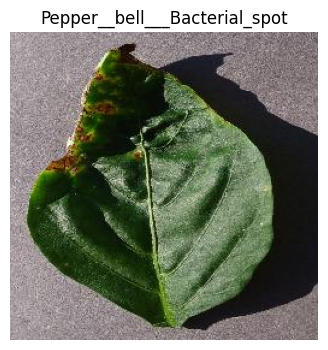

Label: Pepper__bell___healthy


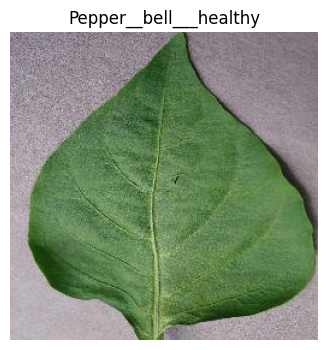

Label: Potato___Early_blight


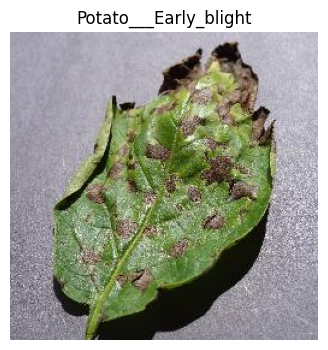

Label: Potato___healthy


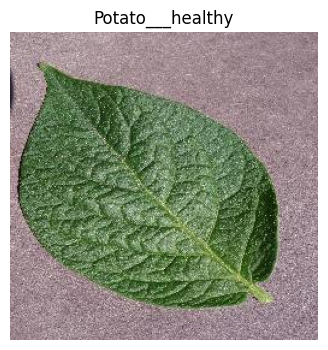

Label: Potato___Late_blight


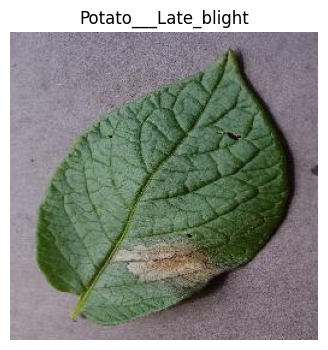

Label: Tomato_Bacterial_spot


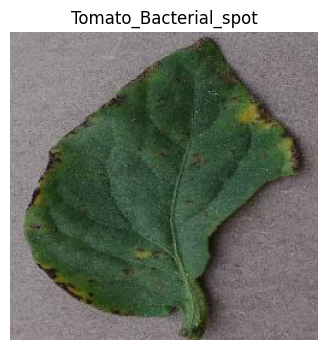

Label: Tomato_Early_blight


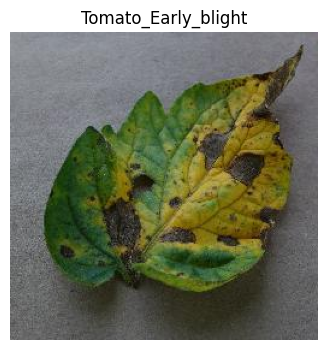

Label: Tomato_healthy


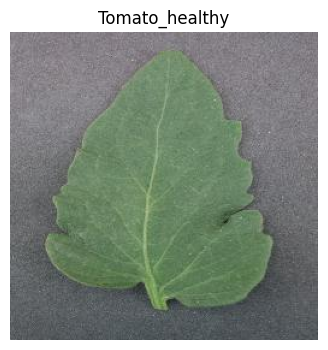

Label: Tomato_Late_blight


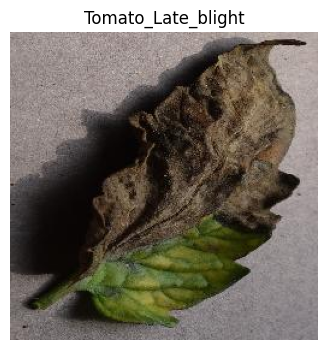

Label: Tomato_Leaf_Mold


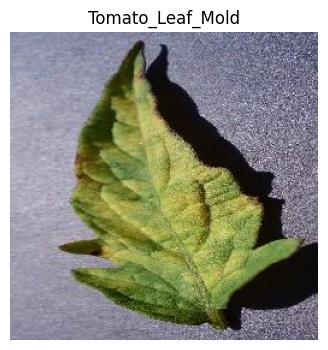

Label: Tomato_Septoria_leaf_spot


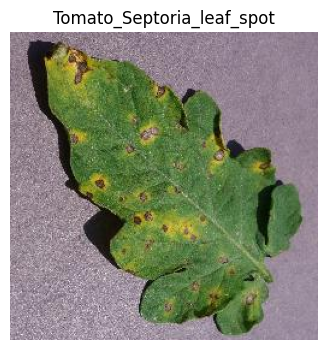

Label: Tomato_Spider_mites_Two_spotted_spider_mite


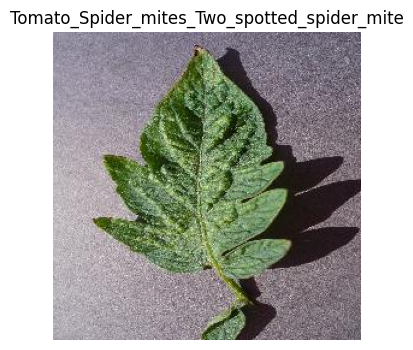

Label: Tomato__Target_Spot


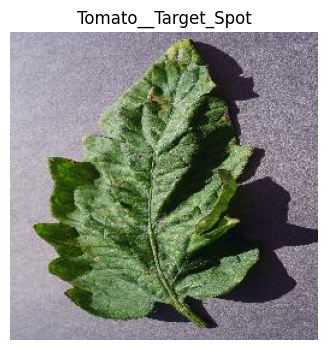

Label: Tomato__Tomato_mosaic_virus


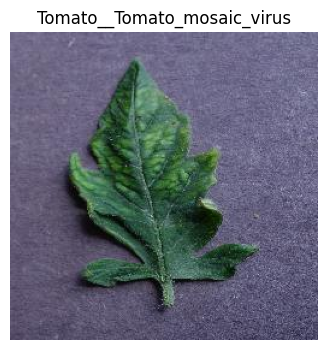

Label: Tomato__Tomato_YellowLeaf__Curl_Virus


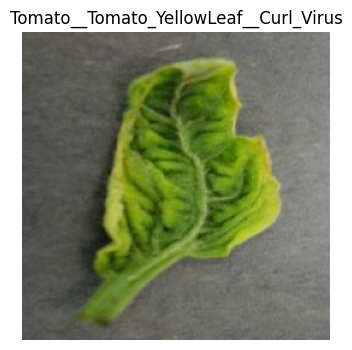

In [26]:
# 1 random Bild von jeder Klasse

# CSV-Datei einlesen
csv_file = "image_data.csv"
df = pd.read_csv(csv_file)

# Dictionary für zufällige Bildauswahl pro Label
random_images = {}

# Ein zufälliges Bild für jedes Label auswählen
for label in df["label"].unique():
    images = df[df["label"] == label]["url"].tolist()
    if images:  # Falls Bilder für das Label existieren
        random_images[label] = random.choice(images)

# Bilder anzeigen
for label, image_path in random_images.items():
    image_path = image_path.replace("file://", "")  # Korrektur der Dateipfade
    
    try:
        print(f"Label: {label}")  # Label ausgeben
        img = Image.open(image_path)  # Bild mit PIL öffnen
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis("off")
        plt.title(label)
        plt.show()
    except Exception as e:
        print(f"Fehler: Bild '{image_path}' konnte nicht geladen werden! ({e})")


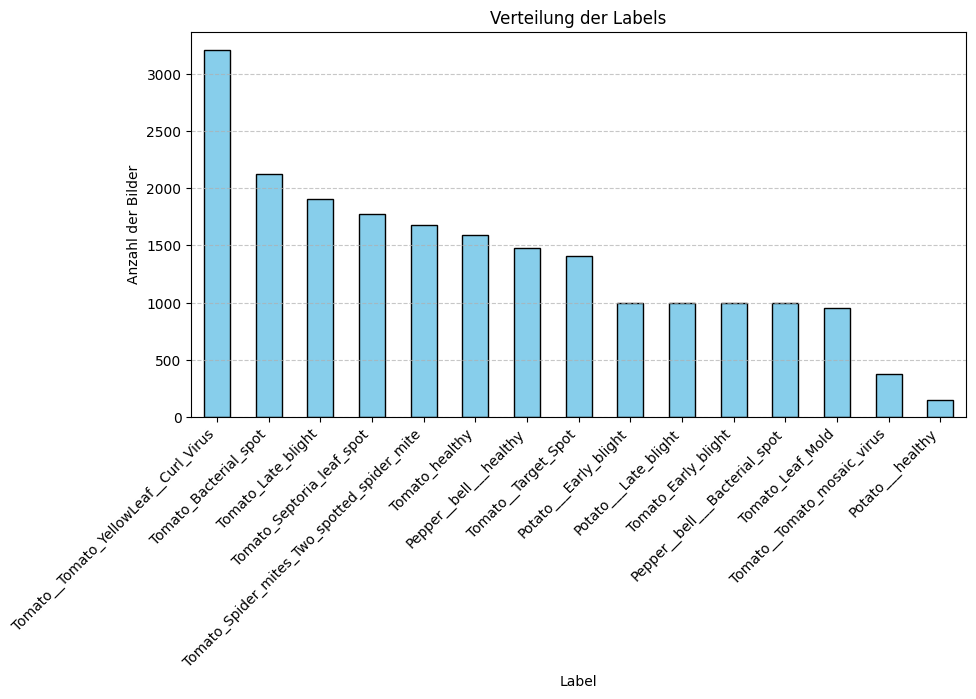

In [27]:
# Verteilung der Daten

# CSV-Datei einlesen
csv_file = "image_data.csv"
df = pd.read_csv(csv_file)

# Label-Häufigkeiten berechnen
label_counts = df["label"].value_counts()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 5))
label_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Label")
plt.ylabel("Anzahl der Bilder")
plt.title("Verteilung der Labels")
plt.xticks(rotation=45, ha="right")  # Labels lesbar machen
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()